In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore', category=Warning)


In [ ]:
#Fetching Average Pooling Dataset

import os

# Specify the folder path (replace with your actual path)
folder_path = "/content/drive/MyDrive/pooled_data/"

# Error handling: Check if folder exists
if not os.path.exists(folder_path):
    raise ValueError(f"Folder '{folder_path}' does not exist. Please provide a valid path.")

# Create an empty list to store the files (optional)
sample = []

# Iterate through files in the folder using os.listdir()
for filename in os.listdir(folder_path):
    # Check if it's a file (not a directory) using os.path.isfile()
    if os.path.isfile(os.path.join(folder_path, filename)):
        # Construct the full path to the file
        full_path = os.path.join(folder_path, filename)

        data = pd.read_csv(full_path, header=None)

        # Process the data (replace with your specific operations)
        print(f"Processing file: {filename}")
        # ... your data processing logic here ...

        # Optionally, add the file to the list (if needed)
        sample.append(data)

In [ ]:

labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust"]*16


print(labels)


['Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad'

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(sample, labels, test_size=.2, random_state=42)

# KFold cross-validation loop
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []  # To store evaluation metrics (e.g., accuracy)

for train_index, val_index in kfold.split(X_train):
  # Split the training data further for train and validation sets within each fold
  X_train_fold = [X_train[i] for i in train_index]
  X_val_fold = [X_train[i] for i in val_index]
  y_train_fold = [y_train[i] for i in train_index]
  y_val_fold = [y_train[i] for i in val_index]


X_train_fold = np.array(X_train_fold)
X_val_fold = np.array(X_val_fold)
y_train_fold = np.array(y_train_fold)
y_val_fold = np.array(y_val_fold)


In [ ]:
#Scaling
scaler = StandardScaler()
for x in X_train_fold:
  scaler.fit(x[:, 1:])

X_train_fold_scaled = []
for x in X_train_fold:
  X_train_fold_scaled.append(scaler.transform(x[:, 1:]))
X_train_fold_scaled = np.array(X_train_fold_scaled)

X_te = []
for x in X_test:
  X_te.append(scaler.transform(x[:, 1:]))
x_test = np.array(X_te)

X_val = []
for x in X_val_fold:
  X_val.append(scaler.transform(x[:, 1:]))
X_val_fold = np.array(X_val)





In [ ]:
print(X_train_fold_scaled.shape)
print(X_val_fold.shape)
print(x_test.shape)

(154, 62, 59399)
(38, 62, 59399)
(48, 62, 59399)


In [ ]:
#One Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.array(y_train_fold).reshape(-1, 1))
y_train_fold_encoded = encoder.transform(np.array(y_train_fold).reshape(-1, 1))
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))
y_val_fold = encoder.transform(np.array(y_val_fold).reshape(-1, 1))

In [ ]:
print(y_train_fold_encoded.shape)
print(y_test.shape)
print(y_val_fold.shape)

(154, 5)
(48, 5)
(38, 5)


In [ ]:
x_train = X_train_fold_scaled.reshape(X_train_fold_scaled.shape[0],X_train_fold_scaled.shape[1], X_train_fold_scaled.shape[2], 1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size = 3, strides=(4,4), activation = tf.nn.relu, input_shape = (x_train.shape[1], x_train.shape[2], 1)),

    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(5, activation = tf.nn.softmax)
])


In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size = (3,3),  activation = tf.nn.relu, input_shape = (x_train.shape[1], x_train.shape[2], 1)),

    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(filters=32, kernel_size = (3,3),  activation = tf.nn.relu),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation = tf.nn.relu),
    tf.keras.layers.Dense(5, activation = tf.nn.softmax)
])

In [ ]:
optimizer = optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
optimizer = optimizers.Adam()
model2.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 4950, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2475, 64)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 2, 2475, 64)       256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 2, 2475, 64)       0         
                                                                 
 flatten (Flatten)           (None, 316800)            0         
                                                                 
 dense (Dense)               (None, 5)                 1

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 18, 19797, 32)     320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9898, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 9896, 32)       9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 4948, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 3, 4948, 32)       128       
 chNormalization)                                                
                                                      

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True, to_file='model.png')

In [ ]:
tf.keras.utils.plot_model(model2,show_shapes = True, to_file='model.png')

In [ ]:
y_val_fold

array(['Happy', 'Happy', 'Neutral', 'Disgust', 'Fear', 'Fear', 'Neutral',
       'Sad', 'Fear', 'Sad', 'Neutral', 'Happy', 'Sad', 'Fear', 'Sad',
       'Happy', 'Fear', 'Happy', 'Sad', 'Neutral', 'Happy', 'Neutral',
       'Sad', 'Sad', 'Sad', 'Sad', 'Disgust', 'Disgust', 'Disgust', 'Sad',
       'Sad', 'Neutral', 'Fear', 'Disgust', 'Happy', 'Sad', 'Disgust',
       'Neutral'], dtype='<U7')

In [ ]:
checkpoint = callbacks.ModelCheckpoint('CNN_poolmodel_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger = callbacks.CSVLogger('training.log')
callbacks_list = [checkpoint, reduce_lr, csv_logger, early_stopping]

In [ ]:
history =   model.fit(X_train_fold_scaled, y_train_fold_encoded, epochs= 100, validation_data=(X_val_fold, y_val_fold),callbacks=callbacks_list).history

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 46.5864 - acc: 0.3064 - recall: 0.2890 - auc: 0.5961 - precision: 0.3086
Epoch 1: val_loss improved from inf to 18.71552, saving model to RNN_poolmodel_detect_emotional.h5
6/6 [==============================] - 3s 305ms/step - loss: 46.5864 - acc: 0.3064 - recall: 0.2890 - auc: 0.5961 - precision: 0.3086 - val_loss: 18.7155 - val_acc: 0.4737 - val_recall: 0.4737 - val_auc: 0.6707 - val_precision: 0.4737 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 18.3776 - acc: 0.7225 - recall: 0.7225 - auc: 0.8379 - precision: 0.7225
Epoch 2: val_loss improved from 18.71552 to 6.97471, saving model to RNN_poolmodel_detect_emotional.h5
6/6 [==============================] - 1s 234ms/step - loss: 18.3776 - acc: 0.7225 - recall: 0.7225 - auc: 0.8379 - precision: 0.7225 - val_loss: 6.9747 - val_acc: 0.4211 - val_recall: 0.4211 - val_auc: 0.6503 - val_precision: 0.4211 - lr: 0.0010
Epoch 3/100
6/6 [======

In [ ]:
  loss, fold_accuracy,reca,auca,prea = model.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

1/1 [==============================] - 0s 77ms/step - loss: 0.7570 - acc: 0.8421 - recall: 0.8421 - auc: 0.9453 - precision: 0.8421
K-Fold Cross-Validation Accuracy: 0.8421052694320679


In [ ]:
loss,acc,rec,auc,pre=model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 44ms/step - loss: 1.5497 - acc: 0.8125 - recall: 0.8125 - auc: 0.9271 - precision: 0.8125


In [ ]:
#average pooling CNN classification_report

from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

# Access specific metrics
precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

# Print specific metrics
print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

2/2 [==============================] - 0s 41ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.73      0.80      0.76        10
           2       0.73      0.62      0.67        13
           3       1.00      0.75      0.86         8
           4       0.82      1.00      0.90         9

    accuracy                           0.81        48
   macro avg       0.83      0.83      0.83        48
weighted avg       0.82      0.81      0.81        48

Overall Accuracy: 0.8125
Average Recall: 0.8125
Average F1-Score: 0.8077556022408964


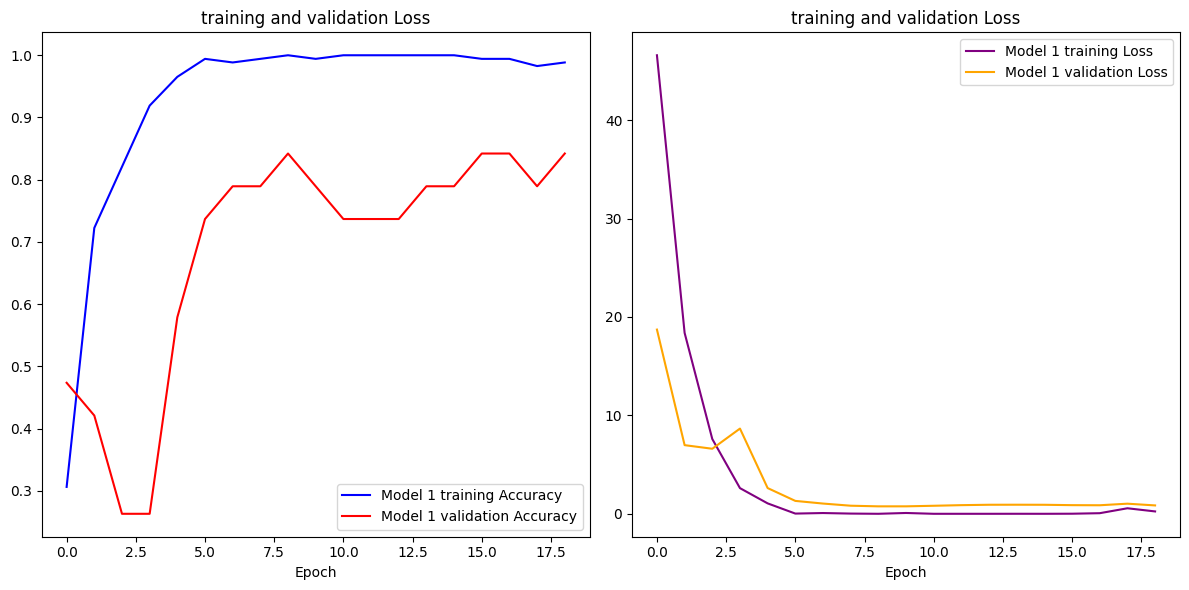

In [ ]:
#average pooling
model_train_loss = history['loss']
model_val_loss = history['val_loss']
model_train_acc = history['acc']
model_val_acc = history['val_acc']

model2_train_loss = history2['loss']
model2_val_loss = history2['val_loss']
model2_train_acc = history2['acc']
model2_val_acc = history2['val_acc']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_train_acc, label='Model 1 training Accuracy', color='blue')
plt.plot(model_val_acc, label='Model 1 validation Accuracy', color='red')

plt.title('training and validation Loss')

plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(model_train_loss, label='Model 1 training Loss', color='purple')
plt.plot(model_val_loss, label='Model 1 validation Loss', color='orange')

plt.title('training and validation Loss')
plt.xlabel('Epoch')

plt.legend()


plt.tight_layout()
plt.show()

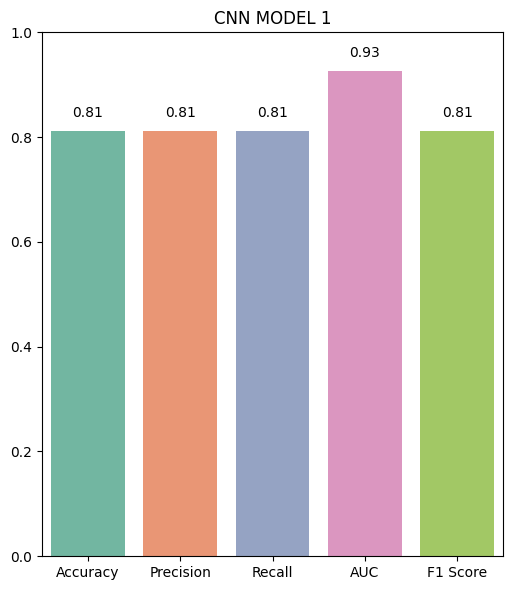

In [ ]:
#average pooling
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics and models
models = ['Accuracy','Precision','Recall','AUC','F1 Score']

accuracy_values = [acc,pre,rec,auc,f1]
accuracy_values2 = [acc2,pre2,rec2,auc2 ]


# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_values, palette='Set2')
plt.title('CNN MODEL 1')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1

# Add text labels for accuracy values
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

# Plot precision


plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

In [ ]:
#average pooling

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title):


  labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust"]

  plt.figure(figsize=(12, 6))  # Adjust figure size as needed

  # Plot confusion matrix for model 1 on the left
  plt.subplot(1, 2, 1)
  plt.imshow(cm1, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix - Model 1")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages instead of raw counts

  thresh = cm1.max() / 2.
  for i in range(len(cm1)):
    for j in range(len(cm1[0])):
      plt.text(j, i, format(cm1[i, j]),  # Display percentages with 2 decimal places
               ha="center", va="center",
               color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.show()

# Calculate confusion matrices
y_pred1 = model.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
cm1 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes1)

# Create the side-by-side confusion matrix plot
plot_confusion_matrix(cm1, list(set(y_test.argmax(axis=1))), cm2)